## Importing Libraries

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

## Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

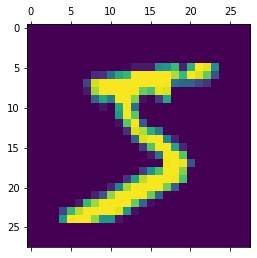

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train.shape

(60000, 28, 28)

## Scaling the x_train, in order to increase the efficiency

In [ ]:
x_train = x_train/255
x_test = x_test/255 

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Converted 2-D array into single dimensional array

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.5761 - accuracy: 0.8383
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1871 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6175 - accuracy: 0.8841
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5547 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4376 - accuracy: 0.8861


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 6.6206 - accuracy: 0.8774


[6.620583534240723, 0.8773999810218811]

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted[3]

array([1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 5.4569356e-16, 1.0000000e+00,
       1.0000000e+00, 2.0842880e-02], dtype=float32)

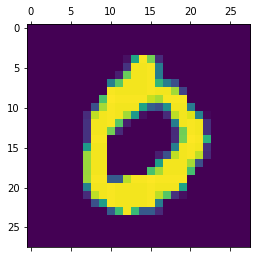

In [ ]:
plt.matshow(x_test[3])

np.argmax finds a maximum element from an array and returns the index of it

In [ ]:
np.argmax(y_predicted[3])

0

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[2, 0, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

The prediction is not accurate as you can see above the first two elements are not matchcing. 

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    2,    1,    2,    1,    0,    0,    0,    0],
       [  11, 1123,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 292,  430,  303,    4,    3,    0,    0,    0,    0,    0],
       [ 164,  314,  409,  123,    0,    0,    0,    0,    0,    0],
       [  37,  110,  274,   89,  472,    0,    0,    0,    0,    0],
       [ 302,  117,  174,  209,   69,   20,    1,    0,    0,    0],
       [ 243,  372,  334,    2,    6,    0,    1,    0,    0,    0],
       [  47,  107,  373,  459,   35,    6,    0,    1,    0,    0],
       [ 108,  459,  362,   17,   20,    8,    0,    0,    0,    0],
       [  28,   98,  158,  559,  163,    0,    0,    3,    0,    0]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

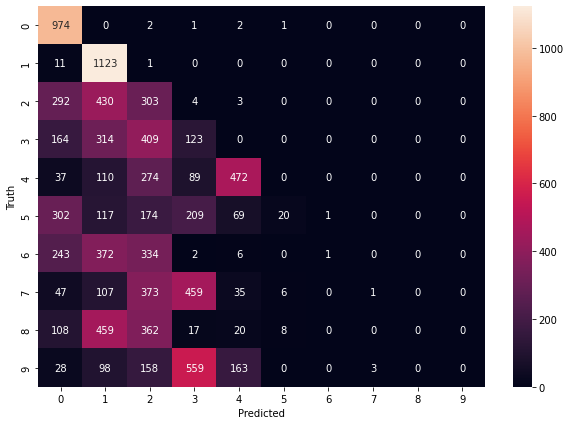

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2844 - accuracy: 0.9187
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1296 - accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0894 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0429 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

We have used a flattened layer, we don't have to call .reshape on input dataset. Thus, we have increased the accuracy along with this. 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9762


[0.0816299319267273, 0.9761999845504761]

In [ ]:
y_predicted = model.predict(x_test)
y_predicted[0]

array([6.3212514e-03, 1.2101531e-03, 7.0145190e-02, 9.8151803e-01,
       4.7192540e-08, 1.6892552e-03, 9.7160409e-07, 9.9999624e-01,
       5.2769184e-03, 2.6895463e-02], dtype=float32)

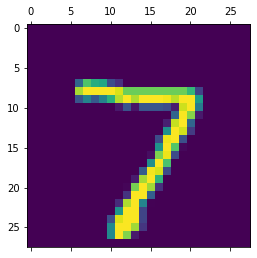

In [ ]:
plt.matshow(x_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

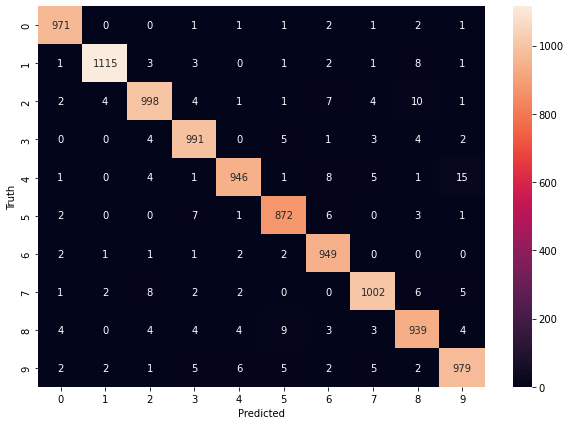

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation = 'swish'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2540 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1077 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0581 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0438 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0294 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0201 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9760


[0.09890908747911453, 0.9760000109672546]